In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("/content/drive/MyDrive/Big Data/news-article-categories.csv")

In [3]:
data.head()

,category,title,body
0,ARTS & CULTURE,Modeling Agencies Enabled Sexual Predators For...,"In October 2017, Carolyn Kramer received a dis..."
1,ARTS & CULTURE,Actor Jeff Hiller Talks “Bright Colors And Bol...,This week I talked with actor Jeff Hiller abou...
2,ARTS & CULTURE,New Yorker Cover Puts Trump 'In The Hole' Afte...,The New Yorker is taking on President Donald T...
3,ARTS & CULTURE,Man Surprises Girlfriend By Drawing Them In Di...,"Kellen Hickey, a 26-year-old who lives in Huds..."
4,ARTS & CULTURE,This Artist Gives Renaissance-Style Sculptures...,There’s something about combining the traditio...


In [4]:
data['category'].unique()

array(['ARTS & CULTURE', 'BUSINESS', 'COMEDY', 'CRIME', 'EDUCATION',
       'ENTERTAINMENT', 'ENVIRONMENT', 'MEDIA', 'POLITICS', 'RELIGION',
       'SCIENCE', 'SPORTS', 'TECH', 'WOMEN'], dtype=object)

In [5]:
def categorize_as_crime(category):
    if category == 'CRIME':
        return 1
    else:
        return 0

In [6]:
data['is_crime'] = data['category'].map(lambda x: categorize_as_crime(x))

In [7]:
data.head()

,category,title,body,is_crime
0,ARTS & CULTURE,Modeling Agencies Enabled Sexual Predators For...,"In October 2017, Carolyn Kramer received a dis...",0
1,ARTS & CULTURE,Actor Jeff Hiller Talks “Bright Colors And Bol...,This week I talked with actor Jeff Hiller abou...,0
2,ARTS & CULTURE,New Yorker Cover Puts Trump 'In The Hole' Afte...,The New Yorker is taking on President Donald T...,0
3,ARTS & CULTURE,Man Surprises Girlfriend By Drawing Them In Di...,"Kellen Hickey, a 26-year-old who lives in Huds...",0
4,ARTS & CULTURE,This Artist Gives Renaissance-Style Sculptures...,There’s something about combining the traditio...,0


In [8]:
data['is_crime'].value_counts()

is_crime
0    6577
1     300
Name: count, dtype: int64

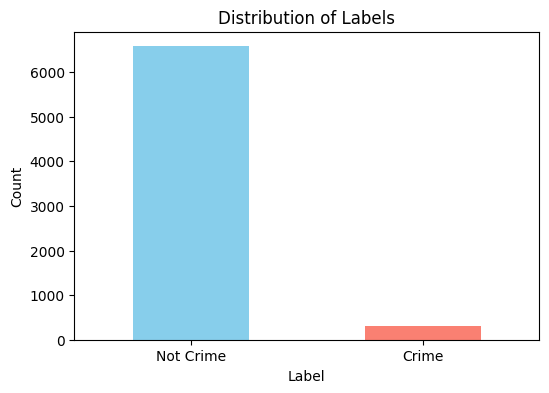

In [9]:
plt.figure(figsize=(6, 4))
data['is_crime'].value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Distribution of Labels')
plt.xlabel('Label')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Not Crime', 'Crime'], rotation=0)
plt.show()

In [10]:
# Shuffle Dataset
data = data.sample(frac=1, random_state=42)

zero_indices = data[data['is_crime'] == 0].index

zero_indices_to_keep = np.random.choice(zero_indices, 300, replace=False)

combined_indices = np.concatenate([zero_indices_to_keep, data[data['is_crime'] == 1].index])

data_balanced = data.loc[combined_indices]

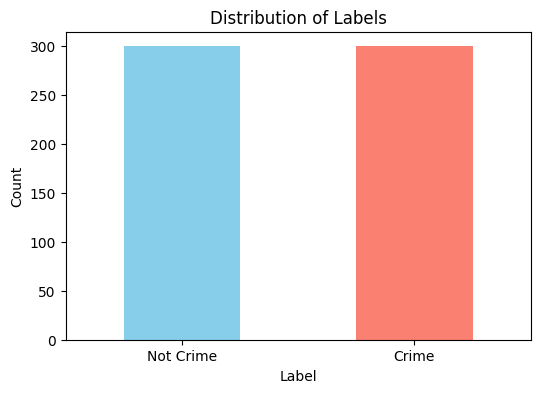

In [11]:
plt.figure(figsize=(6, 4))
data_balanced['is_crime'].value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Distribution of Labels')
plt.xlabel('Label')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Not Crime', 'Crime'], rotation=0)
plt.show()

In [12]:
data_balanced.head()

,category,title,body,is_crime
4566,RELIGION,Allies Form Human Chain Around Muslims Praying...,More than 100 interfaith demonstrators gathere...,0
6297,TECH,Amazon Actually Beats Netflix In The One Area ...,If you value quality over quantity and only wa...,0
1654,COMEDY,Stephen Colbert Shows How Trump’s Own Words Ju...,“Late Show” host Stephen Colbert is back from ...,0
5062,SCIENCE,This TV Meteorologist Has Absolutely Had It Wi...,Count meteorologist Keith Carson among those w...,0
5053,SCIENCE,Mountain Lion Tracked By Scientists Is Found D...,A mother cougar has been found dead near Malib...,0


In [13]:
df = data_balanced.drop('category', axis=1)

In [26]:
df.head()

,title,body,is_crime,clean_title
4566,Allies Form Human Chain Around Muslims Praying...,More than 100 interfaith demonstrators gathere...,0,allies form human chain around muslims praying...
6297,Amazon Actually Beats Netflix In The One Area ...,If you value quality over quantity and only wa...,0,amazon actually beats netflix one area counts
1654,Stephen Colbert Shows How Trump’s Own Words Ju...,“Late Show” host Stephen Colbert is back from ...,0,stephen colbert shows trumps words came back b...
5062,This TV Meteorologist Has Absolutely Had It Wi...,Count meteorologist Keith Carson among those w...,0,tv meteorologist absolutely flatearth movement
5053,Mountain Lion Tracked By Scientists Is Found D...,A mother cougar has been found dead near Malib...,0,mountain lion tracked scientists found dead ne...


In [15]:
df.to_csv('/content/drive/MyDrive/Big Data/crime-notcrime-data.csv')

In [46]:
df = pd.read_csv('/content/drive/MyDrive/Big Data/crime-notcrime-data.csv')

In [47]:
import re
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

In [48]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [49]:
def clean_text(text):
  text = re.sub(r'[^a-zA-Z\s]', '', text)
  text = text.lower()
  stop_words = set(stopwords.words('english'))
  words = nltk.word_tokenize(text)
  filtered_words = [word for word in words if word not in stop_words]
  clean_text = ' '.join(filtered_words)
  return clean_text

In [50]:
# Test text
text = "The quick brown fox jumbped over the lazy dog 123!@#"
cleaned_text = clean_text(text)
print("Cleaned text:", cleaned_text)

vect = TfidfVectorizer()
X = vect.fit_transform([cleaned_text])
print("Vectorized text: ", X.toarray())

Cleaned text: quick brown fox jumbped lazy dog
Vectorized text:  [[0.40824829 0.40824829 0.40824829 0.40824829 0.40824829 0.40824829]]


In [57]:
df['clean_title'] = df['title'].astype(str).apply(clean_text)
df['clean_body'] = df['body'].astype(str).apply(clean_text)

df['combined_text'] = df['clean_title'] + ' ' + df['clean_body']

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['combined_text'])
y = df['is_crime']

In [58]:
df.head()

,Unnamed: 0,title,body,is_crime,clean_title,clean_body,combined_text
0,4566,Allies Form Human Chain Around Muslims Praying...,More than 100 interfaith demonstrators gathere...,0,allies form human chain around muslims praying...,interfaith demonstrators gathered new york cit...,allies form human chain around muslims praying...
1,6297,Amazon Actually Beats Netflix In The One Area ...,If you value quality over quantity and only wa...,0,amazon actually beats netflix one area counts,value quality quantity want pay one streaming ...,amazon actually beats netflix one area counts ...
2,1654,Stephen Colbert Shows How Trump’s Own Words Ju...,“Late Show” host Stephen Colbert is back from ...,0,stephen colbert shows trumps words came back b...,late show host stephen colbert back vacation b...,stephen colbert shows trumps words came back b...
3,5062,This TV Meteorologist Has Absolutely Had It Wi...,Count meteorologist Keith Carson among those w...,0,tv meteorologist absolutely flatearth movement,count meteorologist keith carson among working...,tv meteorologist absolutely flatearth movement...
4,5053,Mountain Lion Tracked By Scientists Is Found D...,A mother cougar has been found dead near Malib...,0,mountain lion tracked scientists found dead ne...,mother cougar found dead near malibu canyon ro...,mountain lion tracked scientists found dead ne...


In [59]:
print(X.shape)

(600, 23836)


In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [61]:
# Naive Bayes
from sklearn.naive_bayes import MultinomialNB

model_NB = MultinomialNB()
model_NB.fit(X_train, y_train)

MultinomialNB()

In [62]:
# Prediction
y_pred = model_NB.predict(X_test)

In [63]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy)
print("Classification Report: ")
print(classification_report(y_test, y_pred))

Accuracy:  0.925
Classification Report: 
              precision    recall  f1-score   support

           0       0.98      0.87      0.92        62
           1       0.88      0.98      0.93        58

    accuracy                           0.93       120
   macro avg       0.93      0.93      0.92       120
weighted avg       0.93      0.93      0.92       120



In [64]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

models = {
    "Support Vector Machine": SVC(),
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Naive Bayes": MultinomialNB()
}

for name, model in models.items():
  print(f"Training {name}")
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  accuracy = accuracy_score(y_test, y_pred)
  print(f"{name} Accuracy: ", accuracy)
  print(f"{name} Classification Report: ")
  print(classification_report(y_test, y_pred))
  print("-" * 40)

Training Support Vector Machine
Support Vector Machine Accuracy:  0.9416666666666667
Support Vector Machine Classification Report: 
              precision    recall  f1-score   support

           0       0.92      0.97      0.94        62
           1       0.96      0.91      0.94        58

    accuracy                           0.94       120
   macro avg       0.94      0.94      0.94       120
weighted avg       0.94      0.94      0.94       120

----------------------------------------
Training Logistic Regression
Logistic Regression Accuracy:  0.95
Logistic Regression Classification Report: 
              precision    recall  f1-score   support

           0       0.94      0.97      0.95        62
           1       0.96      0.93      0.95        58

    accuracy                           0.95       120
   macro avg       0.95      0.95      0.95       120
weighted avg       0.95      0.95      0.95       120

----------------------------------------
Training Random Forest


In [65]:
from sklearn.ensemble import VotingClassifier

estimators = [
    ("Naive Bayes", MultinomialNB()),
    ("Support Vector Machine", SVC()),
    ("Logistic Regression", LogisticRegression()),
    ("Random Forest", RandomForestClassifier()),
    ("Gradient Boosting", GradientBoostingClassifier())
]

voting_classifier = VotingClassifier(estimators)
voting_classifier.fit(X_train, y_train)
y_pred_voting = voting_classifier.predict(X_test)

accuracy_voting = accuracy_score(y_test, y_pred_voting)
print("Voting Classifier Accuracy:", accuracy_voting)
print("Voting Classifier Classification Report:")
print(classification_report(y_test, y_pred_voting))

Voting Classifier Accuracy: 0.9583333333333334
Voting Classifier Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.97      0.96        62
           1       0.96      0.95      0.96        58

    accuracy                           0.96       120
   macro avg       0.96      0.96      0.96       120
weighted avg       0.96      0.96      0.96       120



In [66]:
# Save Model
import _pickle as cPickle

with open("/content/drive/MyDrive/Big Data/VotingClassifierModel.pkl", "wb") as fid:
  cPickle.dump(voting_classifier, fid)

### Test text

In [67]:
# Test sentence
title = "Trump poses unique challenges for jury in his hush-money trial"
body = """ Three months ago, Donald Trump took the stand before a jury of nine in a New York courtroom without his typical bombast or ranting. The former president’s complaints about the case and his sparring with the judge took place out of the jury’s sight in the E. Jean Carroll defamation case, and he gave quick, scripted testimony lasting about three minutes.

The following day, however, Trump found a way to protest the trial with the jury’s eyes on him, storming out during the closing argument delivered by Carroll’s lawyer. “The record will reflect that Mr. Trump just rose and walked out of the courtroom,” Judge Lewis Kaplan announced, in case any jurors had missed it.

That same afternoon, the jury returned an $83.3 million verdict against Trump for defaming Carroll — a massive figure that the columnist’s attorneys attribute in part to Trump’s protest.

“I think it hurt him terribly,” Carroll attorney Roberta Kaplan told CNN’s Anderson Cooper at the time of Trump’s stunt. “I mean, our whole case was about the fact that Donald Trump is unable to follow the law, unable to follow the rules. He thinks they don’t apply to him.”

Beginning Monday, Trump will once again sit before a jury in New York, this time with even higher stakes. The jury of 12, along with six alternates, will be chosen from hundreds of New Yorkers after an exhaustive jury selection process that could stretch beyond the first week of the trial.

Former US President Donald Trump attends a hearing to determine the date of his trial for allegedly covering up hush money payments linked to extramarital affairs, at Manhattan Criminal Court in New York City on March 25, 2024. Trump faces twin legal crises today in New York, where he could see the possible seizure of his storied properties over a massive fine as he separately fights to delay a criminal trial even further. (Photo by JUSTIN LANE / POOL / AFP) (Photo by JUSTIN LANE/POOL/AFP via Getty Images)
RELATED ARTICLE
Opinion: Trump seems to be searching Manhattan for one angry juror
Choosing a jury will be no easy task when the defendant is a former president who has been at the center of the US political world for nearly 10 years now and a figure in the New York tabloids going back decades.

“The problem for both Donald Trump’s attorneys and the prosecution’s attorneys is they’ve got to figure out how to pick a jury for the case who are neutral — and good luck,” said Steve Tuholski, a partner at Delphi Litigation Strategies who works on witness training and jury selection. “I can’t imagine there are many people, especially in New York, that haven’t made up their mind one way or the other about whether he’s a snake or the Messiah. There doesn’t seem to be a middle ground.”

The hush-money case is the first of four criminal trials Trump will potentially face — and potentially the only one before the 2024 election, even as Trump has campaigned in part on fusing his legal peril with his bid for the White House.

The presumptive Republican 2024 nominee will have plenty of incentive to make an impression on both the jury deciding his guilt or innocence and the broader public, whose opinion of the first criminal trial of a former president in US history could be a determining factor in whether Trump is reelected in November.

The vetting process
Court officials expect about 100 prospective jurors at a time will be brought into Judge Juan Merchan’s downtown Manhattan courtroom to be vetted when jury selection begins Monday.

Merchan released this week the questionnaire that will be presented to potential jurors, which contains multiple questions that could signal political views to the lawyers on both sides.

There are questions about news consumption, affiliations with groups like the Proud Boys, QAnon and Antifa, and whether prospective jurors or anyone in their circle attended a Trump rally or an anti-Trump event. Potential jurors will be asked if they’ve ever read books or listened to podcasts from Michael Cohen, Trump’s former lawyer and a key witness for the district attorney, or if they’ve read any of Trump’s own books.

Those in the jury pool will also be asked if they have views on whether a former president can be charged in state court and how Trump is being treated in this case.

The questions will be used for the judge to strike jurors at the outset, if they don’t believe they can render a verdict fairly. They will also be used by lawyers for both sides to strike jurors for any reason — a key part of the jury selection process.

Karen Friedman Agnifilo, a CNN legal analyst and former prosecutor in the Manhattan district attorney’s office, said that Trump’s attorneys will be looking for jurors who are sympathetic to Trump, of course — but also for anyone who might be an “independent thinker,” willing to stand alone and let a jury hang. A unanimous verdict is required for conviction

“If you’re Trump, you’d love an acquittal, but if you can’t get an acquittal, you’d want them to hang, because then there’s no conviction before the election,” Agnifilo said. “You’d want somebody who’s strong enough to be a holdout and somebody who is an independent thinker, who is not going to go along with the group.”

The district attorney’s office will be trying to find jurors who are productive, constructive people who have to make decisions regularly and are capable of judging credibility, Agniflio said, criteria that could cover both office managers as well as parents.

“Sometimes parents are always good, because parents have to listen to what their kid is saying, and sometimes have to make a credibility determination: ‘Is he telling the truth? Is he not telling the truth?’” she said.

One source close to Trump said there is worry that some prospective jurors may have ulterior motives for wanting to be involved in the former president’s trial.

Leaving politics aside
Trump’s lawyers have already argued that he can’t get a fair jury in New York County, which is Manhattan, because the jury pool there is biased against him. They filed a petition this week, which was denied, to delay the trial so the venue could be moved to a different county.

“In terms of pretrial publicity in this county, this case stands alone,” Trump attorney Emil Bove said at Monday’s emergency appeals hearing.

In the 2020 election, Manhattan voters chose President Joe Biden over Trump 86% to 12%. But just having political views about Trump, for or against, won’t be a reason for potential jurors to be dismissed.

“People are going to have an opinion about Trump. That doesn’t mean they can’t be fair and impartial about the evidence and their burden,” Agnifilo said.

The political makeup of Manhattan also doesn’t mean Trump won’t have any supporters among the jury pool. During the Carroll defamation trial — which was in a federal court, meaning the jury came from Manhattan as well as parts of nearby counties — two prospective jurors said they believed the 2020 election was stolen, and three said they contributed to Trump’s campaign or a group supporting it.

All three of those jurors said that wouldn’t affect their ability to be fair and impartial.

Trump took a keen interest in jury selection at the Carroll trial, turning behind him toward the jurors in the gallery behind him to watch as they responded to political questions. When Kaplan asked jurors a series of questions individually, Trump turned in his chair to watch each person speak.

In the defamation case, the jury was fully anonymous, meaning no identifying information about the jurors was made public or shared with the attorneys for either side.

In the hush-money case, the jury will be known to the attorneys, but Merchan has written that identifying information about jurors will not be publicly released to protect privacy and avoid “exposing them to an atmosphere of intimidation.”

Merchan warned Trump in his gag order that the former president can’t make public comments or direct anyone else to make public comments about jurors involved in the proceedings.

A ‘dynamic and unpredictable situation’
Once a jury is selected, they will be able to watch Trump throughout the duration of the trial, which is expected to last six weeks.

That means they can see the former president’s reaction to the district attorney’s allegations, to witness testimony from Stormy Daniels and Michael Cohen, and will potentially see him testify and face questions from the district attorney’s office, should Trump choose to testify.

During the defamation case in January, Trump’s conduct sitting at the defense table became a point of contention, when he made comments calling the case a “witch hunt” and a “con job” in the presence of the jury while Carroll was on the stand. When the jury was excused at a break, Carroll’s lawyers told the judge what Trump was saying and said they believed it was audible to the jury.

That prompted Kaplan to admonish Trump and warn him he could be removed if he continued to be disruptive — prompting the former president to respond that he would “love it” if the judge booted him from the trial.

While the jury was present, Kaplan tried to keep a tight rein on Trump as well as all of the attorneys involved. It took longer for the judge to negotiate Trump’s testimony outside the jury’s view — “I want to know everything he is going to say,” Kaplan told Trump’s attorney — than the three minutes Trump spent on the stand.

Elie Honig, a CNN senior legal analyst and former federal and state prosecutor, warned that Merchan could face a “much more dynamic and unpredictable situation” with Trump in front of the jury for the upcoming hush money trial.

“Something that gets blurted out in front of a jury is permanent,” he said. “As much as a judge will instruct a jury to disregard that, you can’t un-ring the bell.”

Of course, Trump’s conduct can cut both ways for a jury. Tuholski, who works to help prepare witnesses for trial, said that a jury will often sour on witnesses who argue with the judge or don’t answer the questions they’re asked.

“In my world, witness demeanor is almost as important and sometimes more important than the actual witness testimony they offer,” he said.
"""

In [68]:
# Clean and preprocess the text
clean_manual_title = clean_text(title)
clean_manual_body = clean_text(body)

# Combine the title and body into a single text
combined_manual_text = clean_manual_title + ' ' + clean_manual_body

# Vectorize the text
X_manual = vectorizer.transform([combined_manual_text])


# Predict using each trained model
for name, model in models.items():
    prediction = model.predict(X_manual)[0]
    if prediction == 1:
        print(f"{name} predicts: Crime-related")
    else:
        print(f"{name} predicts: Not crime-related")

print(voting_classifier.predict(X_manual)[0])

Support Vector Machine predicts: Not crime-related
Logistic Regression predicts: Not crime-related
Random Forest predicts: Crime-related
Gradient Boosting predicts: Crime-related
Naive Bayes predicts: Crime-related
0


In [69]:
df.head()

,Unnamed: 0,title,body,is_crime,clean_title,clean_body,combined_text
0,4566,Allies Form Human Chain Around Muslims Praying...,More than 100 interfaith demonstrators gathere...,0,allies form human chain around muslims praying...,interfaith demonstrators gathered new york cit...,allies form human chain around muslims praying...
1,6297,Amazon Actually Beats Netflix In The One Area ...,If you value quality over quantity and only wa...,0,amazon actually beats netflix one area counts,value quality quantity want pay one streaming ...,amazon actually beats netflix one area counts ...
2,1654,Stephen Colbert Shows How Trump’s Own Words Ju...,“Late Show” host Stephen Colbert is back from ...,0,stephen colbert shows trumps words came back b...,late show host stephen colbert back vacation b...,stephen colbert shows trumps words came back b...
3,5062,This TV Meteorologist Has Absolutely Had It Wi...,Count meteorologist Keith Carson among those w...,0,tv meteorologist absolutely flatearth movement,count meteorologist keith carson among working...,tv meteorologist absolutely flatearth movement...
4,5053,Mountain Lion Tracked By Scientists Is Found D...,A mother cougar has been found dead near Malib...,0,mountain lion tracked scientists found dead ne...,mother cougar found dead near malibu canyon ro...,mountain lion tracked scientists found dead ne...


## NER

In [70]:
!pip install spacy
!python -m spacy download en_core_web_sm

✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [71]:
from tqdm import tqdm

In [72]:
import spacy

nlp = spacy.load('en_core_web_sm')

def perform_ner(text):
  doc = nlp(text)
  entities = [(ent.text, ent.label_) for ent in doc.ents]
  return entities

In [73]:
# Test text
crime_related_text = "Two suspects were arrested in New York City for robbing a bank Silicon Valley."
ner_results = perform_ner(crime_related_text)
print("Named Entities:", ner_results)

Named Entities: [('Two', 'CARDINAL'), ('New York City', 'GPE'), ('Silicon Valley', 'LOC')]


In [74]:
ner_results[1][1]

'GPE'

In [75]:
!pip install geopy

In [76]:
from geopy.geocoders import Nominatim

geolocator = Nominatim(user_agent="crime_geocoder")

def geocode_locations(location_names):
  coordinates = []
  for location_name in location_names:
    try:
      location = geolocator.geocode(location_name)
      if location:
        coordinates.append((location.latitude, location.longitude))
    except Exception as e:
      print(f"Error geocoding {location_name}: {e}")

  return coordinates

In [77]:
geocode_locations(["Silicon Valley", "New York City"])

[(37.4429964, -122.1545229), (40.7127281, -74.0060152)]

In [78]:
def get_coordinates(clean_text):
  entities = perform_ner(clean_text)
  entities = [entity for entity in entities if (entity[1] == "GPE" or entity[1] == "LOC")]
  coordinates = geocode_locations(entities)
  return coordinates

In [ ]:
# tqdm.pandas()
# df['coordinates'] = df['combined_text'].progress_apply(get_coordinates)

## Predict NEWS Article and Get Location

In [80]:
# Load Model
with open("/content/drive/MyDrive/Big Data/VotingClassifierModel.pkl", "rb") as fid:
  model = cPickle.load(fid)

In [81]:
data = pd.read_csv("https://docs.google.com/spreadsheets/d/e/2PACX-1vSAMr5wZI_AtkM4-vhAsB2Z2YMOET47QLVKjlwEhMduqPhMIydUHG9ngQyqAhvd79MTCnzqKDBozA3L/pub?gid=0&single=true&output=csv")

In [82]:
data.head()

,title,body
0,Biden says he expects Iranian strike on Israel...,President Joe Biden said Friday that he expect...
1,Trump and House Speaker Johnson make remarks i...,Donald Trump and Mike Johnson are making joint...
2,Democrats explore options to get Biden on the ...,The offices of Ohio Secretary of State Frank L...
3,Yellow Scene sues Boulder for not promptly rel...,Yellow Scene Magazine is suing the Boulder cit...
4,Convicted child abuser Jodi Hildebrandt's $5 m...,"Sitting in prison, Jodi Hildebrandt can't see ..."


In [ ]:
def process_test_data(data):
  data['combined_text'] = data['title'].astype(str).apply(clean_text) + ' ' = data['body'].astype(str).apply(clean_text)


In [83]:
data['combined_text'] = data['title'].apply(clean_text) + ' ' + data['body'].apply(clean_text)

In [84]:
data.head()

,title,body,combined_text
0,Biden says he expects Iranian strike on Israel...,President Joe Biden said Friday that he expect...,biden says expects iranian strike israel soone...
1,Trump and House Speaker Johnson make remarks i...,Donald Trump and Mike Johnson are making joint...,trump house speaker johnson make remarks flori...
2,Democrats explore options to get Biden on the ...,The offices of Ohio Secretary of State Frank L...,democrats explore options get biden ballot ala...
3,Yellow Scene sues Boulder for not promptly rel...,Yellow Scene Magazine is suing the Boulder cit...,yellow scene sues boulder promptly releasing f...
4,Convicted child abuser Jodi Hildebrandt's $5 m...,"Sitting in prison, Jodi Hildebrandt can't see ...",convicted child abuser jodi hildebrandts milli...


In [87]:
# vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(data['combined_text'])
data['prediction'] = model.predict(X)

ValueError: X has 681 features, but MultinomialNB is expecting 23836 features as input.

In [86]:
X.shape

(5, 681)